# Is BCD noise audible?

1 July 2023 Guido Cattani

In [1]:
from pathlib import Path
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
from scipy.stats import shapiro as shapiro

In [2]:
# read 1/3 octave bands BCD direct threshold 
def read_BCD_thresholds():
    f_in = '/media/guido/LACIE/Cingle_Guido/Master/Implant/Calculated_data/BC_dir_thr_third.csv'
    p_in = Path(f_in)   
    df = pd.read_csv(p_in, index_col = 'Study_ID')
    return df

In [3]:
# read BCD output noise floor force levels 
def read_BCD_noise_floor_levels():
    f_in = '/media/guido/LACIE/Cingle_Guido/Master/Implant/Primary_data/BCD_noise_floor.csv'
    p_in = Path(f_in)   
    df = pd.read_csv(p_in, index_col = 'Study_ID')
    return df

In [4]:
def audible_noise():
    an = read_BCD_noise_floor_levels() - read_BCD_thresholds()
    return an

In [5]:
def adjust_columns_f(df):
    # adjust column names, change format columns labels 'f_Hz' to f
    clmns = df.columns
    l = list()
    for clm in clmns:
        l.append(clm)
    l2 = list()
    for s in l:
        s = s.rstrip('_Hz')
        s = s.lstrip('f_')
        f = int(s)
        l2.append(f)
    d = dict()
    d1 = dict()
    for i in range(len(l)):
        d.update({l[i] : l2[i]})
        d1.update({l2[i] : l[i]})
    df.rename(columns=d, inplace = True)
    return df

In [6]:
def cal_quantile(srs):
    quantiles = [0.10, 0.50, 0.90]
    q = (srs.quantile(q=quantiles)).round(1)
    q = q.reset_index()
    diq = {0:'Diff. N Floor skull sim. vs. BCdir thr. P10', 1:'Diff. N Floor skull sim. vs. BCdir thr. P50', 2:'Diff. N Floor skull sim. vs. BCdir thr. P90'} 
    q = q.rename(index=diq)
    q.drop('index', axis=1, inplace=True)
    return q

In [7]:
def descriptive_stat(df):
    # calculate quantiles
    quantiles = df.quantile([0.1, 0.5, 0.9]).round(1)
    quantiles.index = ['P10', 'P50', 'P90']
 
    # calculate mean and standard deviation
    mean_values = (pd.DataFrame({'Mean': df.mean().round(1)})).T
    std_values = (pd.DataFrame({'St. dev.': df.std().round(1)})).T

    # perform Shapiro test 
    sht = shapiro_test_norm(df)

    # combine results into a single DataFrame
    res = pd.concat([quantiles, mean_values, std_values, sht])
    
    return res.round(1)

In [8]:
def shapiro_test_norm(df):
    # check normality with Shapiro-Wilk test
    shapiro_result = df.apply(lambda x: shapiro(x) if len(x) >= 3 else (float('nan'), float('nan')))
    
    shapiro_stats = shapiro_result.apply(lambda x: round(x[0], 3))
    p_values = shapiro_result.apply(lambda x: round(x[1], 3))
    is_normal = p_values >= 0.05
    
    shapiro_test = pd.DataFrame({
        'Shapiro test statistic': shapiro_stats,
        'p-value': p_values,
        'normally distributed': is_normal
    }).transpose()
    
    return shapiro_test

In [9]:
aud_noise = adjust_columns_f(audible_noise())
aud_noise

,250,315,400,500,630,800,1000,1250,1600,2000,2500,3150,4000,5000,6300,8000
Study_ID,,,,,,,,,,,,,,,,
34,-49.7,-43.6,-37.3,-27.9,-16.0,-5.1,9.4,4.8,2.1,2.4,-2.4,-5.6,-5.4,-20.1,-33.6,-36.6
35,-41.3,-39.1,-34.4,-28.5,-14.7,-7.3,-7.3,-3.4,-3.7,-15.2,-5.9,-1.5,-15.6,-27.0,-36.5,-41.3
43,-38.8,-35.4,-30.2,-24.0,-14.9,-9.8,-5.9,-2.8,-1.7,-4.8,-7.5,-13.0,-29.4,-13.4,-1.3,-5.8
47,-48.5,-42.5,-33.4,-24.5,-22.4,-18.3,-6.0,-0.8,3.7,9.9,10.1,11.1,6.1,3.8,1.4,-1.7
50,-48.2,-42.7,-37.8,-29.5,-18.1,-9.4,-1.5,-0.8,1.5,7.5,2.2,-1.8,-5.1,-2.7,-2.2,-6.2
53,-48.0,-46.8,-41.4,-34.9,-19.5,-10.0,-5.7,0.8,5.8,3.6,-0.9,-5.0,-2.4,-8.9,-14.2,-16.7
54,-49.1,-45.9,-37.6,-29.6,-17.7,-11.5,-15.3,-5.8,0.2,-1.7,-5.0,-9.1,-14.0,-8.8,-4.5,-6.8
56,-50.1,-47.1,-42.8,-35.7,-16.6,-9.0,-19.3,-14.3,-10.9,-6.0,-10.6,-18.4,-33.9,-14.8,1.6,-1.5
59,-56.8,-51.5,-42.9,-32.2,-24.3,-19.2,-15.3,-5.0,3.8,7.3,3.1,0.4,-2.9,-0.8,-0.7,-6.1


In [10]:
# perform calculation of quantiles 10, 50, 90
qntl = cal_quantile(aud_noise)

In [11]:
# Diff. Noise Floor measured on skull sim. minus BC-direct thresholds

des_stat = descriptive_stat(aud_noise)
des_stat

,250,315,400,500,630,800,1000,1250,1600,2000,2500,3150,4000,5000,6300,8000
P10,-56.4,-51.7,-44.9,-37.0,-25.1,-18.4,-16.1,-11.2,-8.1,-6.3,-6.1,-9.5,-17.0,-20.2,-31.8,-36.0
P50,-48.8,-45.7,-38.4,-29.6,-18.7,-11.4,-9.3,-4.2,-1.5,2.0,-0.9,-1.3,-3.7,-7.9,-7.0,-10.6
P90,-41.2,-37.3,-32.3,-23.8,-14.5,-7.2,-3.9,-0.6,4.6,7.7,4.2,8.8,4.0,0.4,0.7,-1.9
Mean,-48.9,-44.8,-38.7,-30.5,-19.1,-12.2,-9.3,-5.2,-1.6,0.5,-0.4,-1.4,-5.7,-8.1,-10.6,-14.6
St. dev.,5.2,5.2,5.3,5.6,4.4,4.5,6.7,5.0,6.3,6.5,5.1,7.6,11.0,8.2,12.0,12.2
Shapiro test statistic,0.921,0.955,0.968,0.964,0.971,0.944,0.916,0.973,0.928,0.949,0.971,0.972,0.89,0.956,0.858,0.871
p-value,0.104,0.457,0.703,0.636,0.779,0.281,0.083,0.821,0.144,0.355,0.773,0.795,0.027,0.476,0.007,0.012
normally distributed,True,True,True,True,True,True,True,True,True,True,True,True,False,True,False,False


In [12]:
# name file descriptive stat results
f_ar = "noise_floor_audibility.csv"

# save descriptive stat to file
d_ar = "/media/guido/LACIE/Cingle_Guido/Master/Implant/Analysis_Results/"
p_ar = Path(d_ar + f_ar)
des_stat.to_csv(p_ar)

In [13]:
# select data columns for plot with frequency 1 - 8 kHz  and convert data to numpy arrays

#aud_noise = aud_noise.drop(columns =[250, 315, 400, 500, 630, 800]) 
#qntl = qntl.drop(columns =[250, 315, 400, 500, 630, 800])

frqc = np. array(aud_noise.columns , dtype=int)
bh5 = (aud_noise.T).to_numpy()
p50 = qntl.loc['Diff. N Floor skull sim. vs. BCdir thr. P50'].to_numpy()
p10 = qntl.loc['Diff. N Floor skull sim. vs. BCdir thr. P10'].to_numpy()
p90 = qntl.loc['Diff. N Floor skull sim. vs. BCdir thr. P90'].to_numpy()

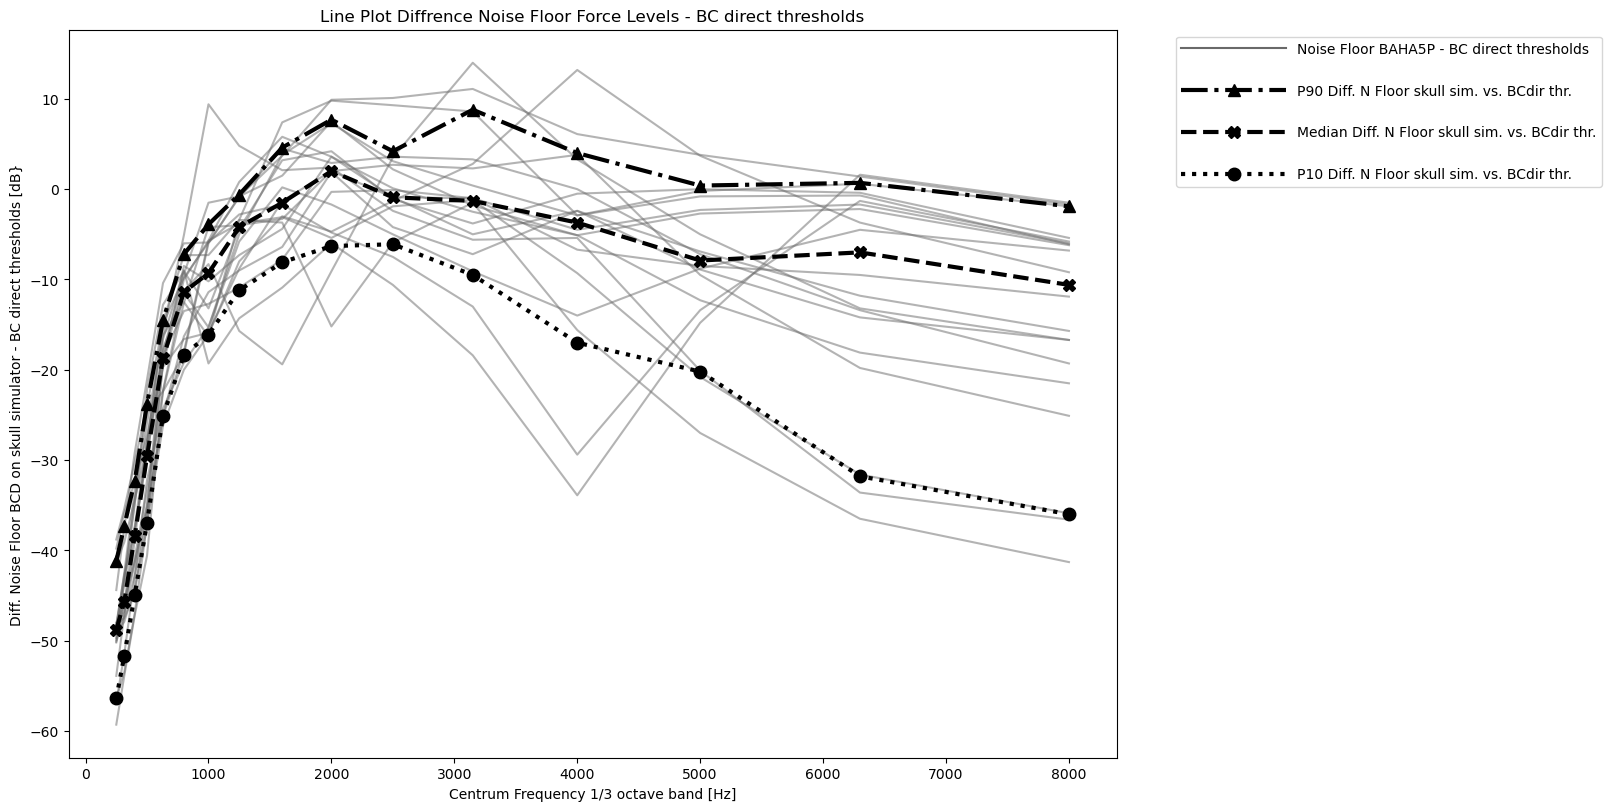

In [14]:
# make a figure to plot results

plt.rcParams['axes.facecolor'] = 'white'

fig, (ax) = plt.subplots(1, constrained_layout=True)

fig.set_figheight(8)
fig.set_figwidth(16)

# make the line plot
ax.set(xlabel='Centrum Frequency 1/3 octave band [Hz]', ylabel='Diff. Noise Floor BCD on skull simulator - BC direct thresholds [dB}',
       title='Line Plot Diffrence Noise Floor Force Levels - BC direct thresholds')

# plot lines based on numpy arrays
ax.plot(frqc, bh5, color="dimgrey", alpha=0.5, label='Noise Floor BAHA5P')
ax.plot(frqc, p50, color='black', marker='X', linestyle='dashed', linewidth=3, markersize=9)
ax.plot(frqc, p10, color='black', marker='o', linestyle='dotted', linewidth=3, markersize=9)
ax.plot(frqc, p90, color='black', marker='^', linestyle='dashdot', linewidth=3, markersize=9)

# make a legend
leg_line_BH5 = mlines.Line2D([], [], color="dimgrey", label='Noise Floor BAHA5P - BC direct thresholds')

leg_p90_bh5 = mlines.Line2D([], [], color='black', marker='^', linestyle='dashdot', 
                            linewidth=3, markersize=9, label='P90 Diff. N Floor skull sim. vs. BCdir thr.')
leg_med_bh5 = mlines.Line2D([], [], color='black', marker='X', linestyle='dashed', 
                            linewidth=3, markersize=9, label='Median Diff. N Floor skull sim. vs. BCdir thr.')
leg_p10_bh5 = mlines.Line2D([], [], color='black', marker='o', linestyle='dotted', 
                            linewidth=3, markersize=9, label='P10 Diff. N Floor skull sim. vs. BCdir thr.')

leg = plt.legend(handles=[leg_line_BH5, leg_p90_bh5, leg_med_bh5, leg_p10_bh5], bbox_to_anchor=(1.05, 1), 
                 loc='upper left', labelspacing=2., handlelength=7.5)

# save the figure
plt.savefig('/media/guido/LACIE/Cingle_Guido/Master/Implant/Analysis_Graphs/noise_floor_audibility.tiff', 
            transparent=False, dpi=500, bbox_inches="tight")

plt.show() # show the figure